# Wildfire Dataset
## Michael Peters and Nick Latham
### CPSC 322 Spring 2021


## Introduction

The dataset that we used was the DNR Fire Statistics for the state of Washington from 1970 to present. In the dataset, we used the month, cause, county, latitude, and longitude of each fire to predict the acres burned. We found that the random forests classifier worked the best.



## Data Analysis
### Dataset
The dataset contains attributes for the cause (string), date(string), county(string), latitude(float), longitude(float), and acres burned (float). There are also attributes for binned values of the latitude, logitude, and acres burned, which are all integers. The attribute that we set out to predict was the binned acres attribute. 

### Summary Statistics of the dataset

The dataset contains 37000 instances

### Data Visualizations of the dataset

In [2]:
import mysklearn.mypytable
from mysklearn.mypytable import MyPyTable 

from matplotlib import pyplot as mp
from plot_utils import *

wildfire_fname = os.path.join("data","clean_fire_data.csv")
wildfire_table = MyPyTable()
wildfire_table.load_from_file(wildfire_fname)

fire_date = wildfire_table.get_column("date")
county = wildfire_table.get_column("county")
acres = wildfire_table.get_column("acres")
cause = wildfire_table.get_column("cause")

Figure 1

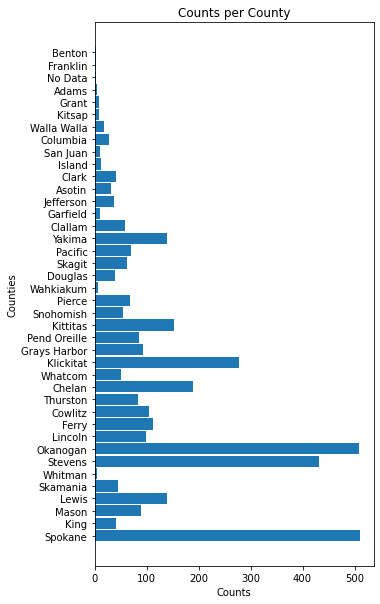

In [3]:
county_keys, county_counts = get_counts(county)
plot_hbar(county_keys, county_counts, "Counts", "Counties", "Counts per County")

Figure 2

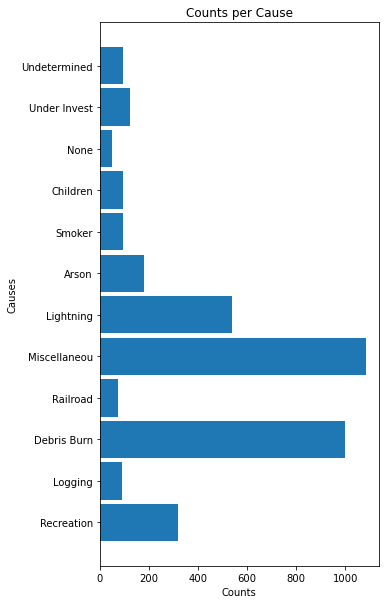

In [4]:
cause_keys, cause_counts = get_counts(cause)
plot_hbar(cause_keys, cause_counts, "Counts", "Causes", "Counts per Cause")

Figure 3

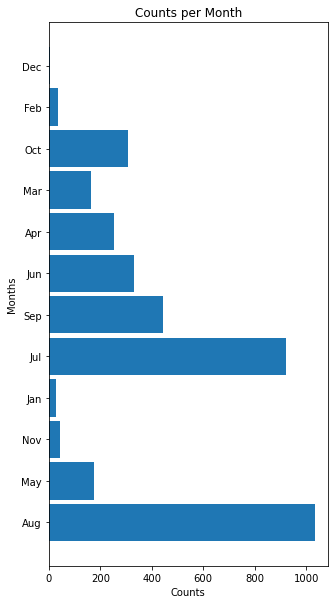

In [5]:
date_keys, date_counts = get_counts(fire_date)
plot_hbar(date_keys, date_counts, "Counts", "Months", "Counts per Month")

Figure 4

In [8]:
import matplotlib.ticker as plticker

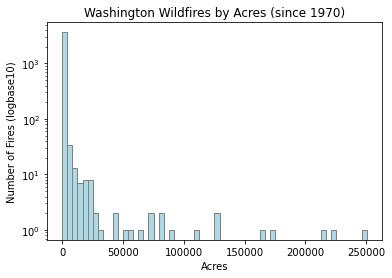

In [9]:
fig, ax = mp.subplots(1,1)
ax.hist(acres, bins=60, color='lightblue', edgecolor='grey')
ax.set_title("Washington Wildfires by Acres (since 1970)")
ax.set_xlabel('Acres')  # Add an x-label to the axes.
ax.set_ylabel('Number of Fires (logbase10)')  # Add a y-label to the axes.
loc = plticker.AutoLocator() # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
mp.yscale("log")
# mp.savefig("img/fires_acres.png", transparent=False, facecolor='w', edgecolor='w' )
mp.show()

In Figure 1 we see the counts of fires by county. We see that Spokane, Stevens, and Okanogan counties have the highest counts of fires.

In Figure 2 we see the distribution of fres by cause. Lightning, misceleneuous, and debris were the highest causes of fires, the other causes were fairly equal. 

In Figure 3 we see the distribution of fires by month. Not suprisingly, the majority of fires happen in late summer/early fall. 

In Figure 4 we see the distribution of fires by acre size. For this graph we used a log graph since the majority of fires happen wihin a low acre amount. 

## Classification Results

The classifiers that we used to test our dataest were Random Forests, KNN Closest Neighbor, and Naive Bayes. For each of these classifiers we inplemented them by creating a class for each, and within each class, functions to fit and predict the data. For the Random Forests, we had F, N, and M variables that we passed into the fit function, and we tested the Random Forests algorithm using a variety of different F, N, M values. We tested the effecteveness of the different classifiers using a Jupyter Notebook where we tested each classifier using 1000 random samples from the dataset. We found that the best classifier was Random Forests which had around a 43% accuracy using F=1, M=5, and N=4. KNN and Naive Bayes both had around 32-37% accuracy. 


Heroku Link: 


## Conclusion

In conclusion, we found that Random Forests had the best classification results with 43% accuracy. Because the dataset was so large, we initially had trouble with random forests since there were so many different values for the acres as well as latitude and longitude. But once we binned those attributes, we were able to make random forests work well.  